In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

# We are required to do this in order to avoid "FutureWarning" issues.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [233]:
df = pd.read_csv('./data/transformed/mm_wgi_pe.csv')

In [234]:
df.columns

Index(['country_name', 'year', 'region', 'protestnumber', 'protesterviolence',
       'participants_category', 'start_date', 'end_date', 'duration',
       'labor wage dispute', 'land farm issue', 'police brutality',
       'political behavior, process', 'price increases, tax policy',
       'removal of politician', 'social restrictions', 'accomodation',
       'arrests', 'beatings', 'crowd dispersal', 'ignore', 'killings',
       'shootings', 'CC.EST', 'GE.EST', 'PV.NO.SRC', 'RL.EST', 'VA.EST',
       'SI.DST.05TH.20', 'SI.POV.GINI', 'SP.POP.TOTL'],
      dtype='object')

In [237]:
def prep_for_time_series_model_by_country(df, country, start_date='2006', end_date='2021'):
    df = df[df['country_name'] == country]
    df = df.sort_values(by='start_date')
    df.set_index(pd.DatetimeIndex(df['start_date']), inplace=True)
    df = df.loc[start_date:end_date]
    df.drop(columns = ['year', 'end_date', 'country_name', 'region', 'protestnumber','end_date'], inplace=True)
    return df



In [238]:
kyrgyz_df = prep_for_time_series_model_by_country(df, 'Kyrgyzstan')

In [239]:
kyrgyz_df.isna().sum()

protesterviolence              0
participants_category          0
start_date                     0
duration                       0
labor wage dispute             0
land farm issue                0
police brutality               0
political behavior, process    0
price increases, tax policy    0
removal of politician          0
social restrictions            0
accomodation                   0
arrests                        0
beatings                       0
crowd dispersal                0
ignore                         0
killings                       0
shootings                      0
CC.EST                         0
GE.EST                         0
PV.NO.SRC                      0
RL.EST                         0
VA.EST                         0
SI.DST.05TH.20                 3
SI.POV.GINI                    3
SP.POP.TOTL                    3
dtype: int64

In [240]:
kyrgyz_df['SI.POV.GINI'].describe()

count    121.000000
mean      28.577686
std        2.008876
min       26.800000
25%       27.400000
50%       27.800000
75%       28.800000
max       37.400000
Name: SI.POV.GINI, dtype: float64

In [241]:
kyrgyz_df[kyrgyz_df['SI.POV.GINI'].isna()]

,protesterviolence,participants_category,start_date,duration,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,...,killings,shootings,CC.EST,GE.EST,PV.NO.SRC,RL.EST,VA.EST,SI.DST.05TH.20,SI.POV.GINI,SP.POP.TOTL
start_date,,,,,,,,,,,,,,,,,,,,,
2020-02-17,0,5,2020-02-17,1 days,0,0,0,1,0,0,...,0,0,-1.110902,-0.540158,6.0,-0.926575,-0.594164,NaN,NaN,NaN
2020-03-02,1,5,2020-03-02,1 days,0,0,0,1,0,0,...,0,0,-1.110902,-0.540158,6.0,-0.926575,-0.594164,NaN,NaN,NaN
2020-03-08,0,3,2020-03-08,1 days,0,0,0,1,0,0,...,0,0,-1.110902,-0.540158,6.0,-0.926575,-0.594164,NaN,NaN,NaN


In [242]:
pd.DataFrame(kyrgyz_df['SI.POV.GINI'])

,SI.POV.GINI
start_date,
2006-04-29,37.4
2006-05-27,37.4
2006-08-11,37.4
2006-11-02,37.4
2007-04-12,33.9
...,...
2019-01-17,29.7
2019-11-25,29.7
2020-02-17,NaN


In [243]:
kyrgyz_df[kyrgyz_df.index > '2020']

,protesterviolence,participants_category,start_date,duration,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,...,killings,shootings,CC.EST,GE.EST,PV.NO.SRC,RL.EST,VA.EST,SI.DST.05TH.20,SI.POV.GINI,SP.POP.TOTL
start_date,,,,,,,,,,,,,,,,,,,,,
2020-02-17,0,5,2020-02-17,1 days,0,0,0,1,0,0,...,0,0,-1.110902,-0.540158,6.0,-0.926575,-0.594164,NaN,NaN,NaN
2020-03-02,1,5,2020-03-02,1 days,0,0,0,1,0,0,...,0,0,-1.110902,-0.540158,6.0,-0.926575,-0.594164,NaN,NaN,NaN
2020-03-08,0,3,2020-03-08,1 days,0,0,0,1,0,0,...,0,0,-1.110902,-0.540158,6.0,-0.926575,-0.594164,NaN,NaN,NaN


Because there are only 3 missing values for GINI score and population, and they are all from 2020, I will exclude 2020 from this model. 

I will also drop the following indicators since they are mostly representative of null values - there simply isn't enough data for them to be useful at this juncture:

|Indicator to Drop|Nulls|
|--|--|
SI.POV.ATTM.MI     |            122
SI.POV.ELEC.MI      |           122
SI.POV.ENRL.MI       |          124
SI.POV.WATR.MI        |         122
SI.SPR.BL50.ZS            |     124

In [244]:
# verifying that shape after dropping nulls will result in loss of 3 rows(representative of 2020)
kyrgyz_df.dropna().shape

(121, 26)

In [245]:
#dropping 2020/nulls
kyrgyz_df.dropna(inplace=True)

In [246]:
kyrgyz_df

,protesterviolence,participants_category,start_date,duration,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,...,killings,shootings,CC.EST,GE.EST,PV.NO.SRC,RL.EST,VA.EST,SI.DST.05TH.20,SI.POV.GINI,SP.POP.TOTL
start_date,,,,,,,,,,,,,,,,,,,,,
2006-04-29,0,5,2006-04-29,1 days,0,0,0,1,0,0,...,0,0,-1.317895,-0.805855,5.0,-1.313625,-0.759082,44.9,37.4,5218400.0
2006-05-27,0,6,2006-05-27,1 days,0,0,0,1,0,0,...,0,0,-1.317895,-0.805855,5.0,-1.313625,-0.759082,44.9,37.4,5218400.0
2006-08-11,0,5,2006-08-11,1 days,0,0,1,0,0,0,...,0,0,-1.317895,-0.805855,5.0,-1.313625,-0.759082,44.9,37.4,5218400.0
2006-11-02,0,5,2006-11-02,8 days,0,0,0,1,0,0,...,0,0,-1.317895,-0.805855,5.0,-1.313625,-0.759082,44.9,37.4,5218400.0
2007-04-12,0,6,2007-04-12,8 days,0,0,0,1,0,0,...,0,0,-1.319990,-0.778129,5.0,-1.318499,-0.962736,41.9,33.9,5268400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-04-03,1,2,2014-04-03,1 days,0,1,0,1,0,0,...,0,0,-1.127966,-0.865938,6.0,-0.927017,-0.462497,37.0,26.8,5835500.0
2016-03-14,0,3,2016-03-14,1 days,0,0,0,0,1,0,...,0,0,-1.079152,-0.895710,6.0,-1.023083,-0.418677,37.2,26.8,6079500.0
2018-06-06,0,5,2018-06-06,1 days,0,0,0,1,0,0,...,0,0,-0.949304,-0.607261,7.0,-0.904466,-0.357299,37.8,27.7,6322800.0


In [247]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

In [248]:
month = kyrgyz_df.resample('M').sum()

In [249]:
month.shape

(164, 24)

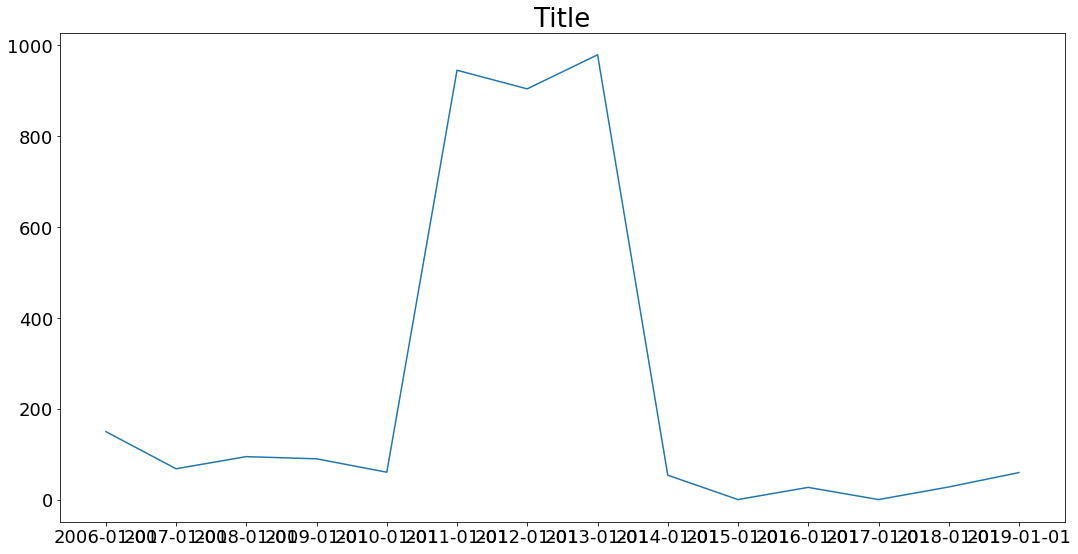

In [250]:
plot_series(kyrgyz_df.resample('YS').sum(), cols=['SI.POV.GINI'])

In [251]:
month['first_diff_gini'] = month['SI.POV.GINI'].diff(1)
month['annual_diff_gini'] = month['SI.POV.GINI'].diff(12)

In [266]:
month['annual_diff_gini'].value_counts()

 0.0      84
 111.2     4
-26.8      3
-28.8      3
-37.4      3
-115.2     3
 29.7      2
-86.4      2
 1.4       2
 25.5      2
-57.6      2
 55.6      2
 30.1      2
-83.8      2
 115.2     1
 54.0      1
 26.8      1
-49.2      1
-59.8      1
 2.8       1
-1.6       1
 27.7      1
-0.8       1
-27.7      1
 83.4      1
-2.4       1
 25.8      1
 5.6       1
-4.8       1
-117.2     1
 137.0     1
 57.6      1
 89.2      1
 59.8      1
 30.4      1
 166.8     1
 59.0      1
-56.0      1
-55.6      1
-56.4      1
-78.0      1
-29.9      1
-108.2     1
 27.8      1
-21.8      1
-63.0      1
-27.8      1
 31.5      1
 108.8     1
-88.4      1
Name: annual_diff_gini, dtype: int64

In [253]:
month.isna().sum()

protesterviolence               0
participants_category           0
labor wage dispute              0
land farm issue                 0
police brutality                0
political behavior, process     0
price increases, tax policy     0
removal of politician           0
social restrictions             0
accomodation                    0
arrests                         0
beatings                        0
crowd dispersal                 0
ignore                          0
killings                        0
shootings                       0
CC.EST                          0
GE.EST                          0
PV.NO.SRC                       0
RL.EST                          0
VA.EST                          0
SI.DST.05TH.20                  0
SI.POV.GINI                     0
SP.POP.TOTL                     0
first_diff_gini                 1
annual_diff_gini               12
dtype: int64

In [254]:
month.dropna().shape

(152, 26)

In [268]:
features = month.drop(columns=['annual_diff_gini', 'first_diff_gini']).columns
y = month['annual_diff_gini']
X = month[features]

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                  test_size= 0.1,
                                  shuffle=False)

In [270]:
from statsmodels.tsa.arima_model import ARIMA

In [271]:
import warnings

In [272]:
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [273]:
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        
        # Insert try and except statements.
        try:
            
            # Fitting an ARIMA(p, 1, q) model.
            print(f'Attempting to fit ARIMA({p},1,{q})')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog = y_train.astype(float).dropna(), # endog = Y variable
                          order = (p,1,q)) # values of p, d, q
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 1, q) model.
            print(f'The AIC for ARIMA({p},1,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},1,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting to fit ARIMA(0,1,0)
The AIC for ARIMA(0,1,0) is: 1419.240158313388
Attempting to fit ARIMA(0,1,1)
The AIC for ARIMA(0,1,1) is: 1401.5290025366667
Attempting to fit ARIMA(0,1,2)
The AIC for ARIMA(0,1,2) is: 1388.262327062505
Attempting to fit ARIMA(0,1,3)
The AIC for ARIMA(0,1,3) is: 1389.097355315209
Attempting to fit ARIMA(0,1,4)
The AIC for ARIMA(0,1,4) is: 1386.7589076310355
Attempting to fit ARIMA(1,1,0)
The AIC for ARIMA(1,1,0) is: 1415.6928492518632
Attempting to fit ARIMA(1,1,1)


/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsm

The AIC for ARIMA(1,1,1) is: 1389.3549636558469
Attempting to fit ARIMA(1,1,2)
The AIC for ARIMA(1,1,2) is: 1389.6048587364526
Attempting to fit ARIMA(1,1,3)
The AIC for ARIMA(1,1,3) is: 1388.7663397452889
Attempting to fit ARIMA(1,1,4)


/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsm

The AIC for ARIMA(1,1,4) is: 1388.2411669088015
Attempting to fit ARIMA(2,1,0)
The AIC for ARIMA(2,1,0) is: 1407.225234139736
Attempting to fit ARIMA(2,1,1)
The AIC for ARIMA(2,1,1) is: 1388.8439607197533
Attempting to fit ARIMA(2,1,2)
The AIC for ARIMA(2,1,2) is: 1379.6303061931008
Attempting to fit ARIMA(2,1,3)


/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


The AIC for ARIMA(2,1,3) is: 1386.4870117008934
Attempting to fit ARIMA(2,1,4)


/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsm

The AIC for ARIMA(2,1,4) is: 1387.8163375029972
Attempting to fit ARIMA(3,1,0)
The AIC for ARIMA(3,1,0) is: 1399.5234572994805
Attempting to fit ARIMA(3,1,1)
The AIC for ARIMA(3,1,1) is: 1390.3729769510664
Attempting to fit ARIMA(3,1,2)
The AIC for ARIMA(3,1,2) is: 1392.021105143513
Attempting to fit ARIMA(3,1,3)


/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


The AIC for ARIMA(3,1,3) is: 1386.0045326444374
Attempting to fit ARIMA(3,1,4)


/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsm

The AIC for ARIMA(3,1,4) is: 1387.441096345777
Attempting to fit ARIMA(4,1,0)
The AIC for ARIMA(4,1,0) is: 1400.215012292849
Attempting to fit ARIMA(4,1,1)
The AIC for ARIMA(4,1,1) is: 1392.3729200157368
Attempting to fit ARIMA(4,1,2)


/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


The AIC for ARIMA(4,1,2) is: 1393.9093681034346
Attempting to fit ARIMA(4,1,3)
The AIC for ARIMA(4,1,3) is: 1387.9333465200207
Attempting to fit ARIMA(4,1,4)


MODEL FINISHED!
Our model that minimizes AIC on the training data is the ARIMA(2,1,2).
This model has an AIC of 1379.6303061931008.


/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


12 month diff: Our model that minimizes AIC on the training data is the ARIMA(2,1,2).
This model has an AIC of 1379.6303061931008.

Month: Our model that minimizes AIC on the training data is the ARIMA(0,1,3).
This model has an AIC of 1426.760229284126.

In [277]:
# Instantiate best model.
model = ARIMA(endog = y_train.astype(float).dropna(), # endog = Y variable
              order = (2,1,2))

# Fit ARIMA model.
arima = model.fit()

# Generate predictions based on test set.
preds = model.predict(params = arima.params,
                      start = y_test.index[0],
                      end = y_test.index[-1])





/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsm

In [278]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [279]:
mean_squared_error(y_test, preds)**.5

12.750121685559792

In [280]:
r2_score(y_test, preds)

-0.11780507936008289

In [264]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [265]:
kyrgyz_non_time = pd.read_csv('./data/transformed/df_for_modeling/kyrgyzstan.csv')
kyrgyz_non_time.drop(columns=['SI.POV.ATTM.MI', 'SI.POV.ELEC.MI', 'SI.POV.ENRL.MI', 'SI.POV.WATR.MI', 'SI.SPR.BL50.ZS'], inplace=True)
kyrgyz_non_time.dropna(inplace=True)

In [161]:
kyrgyz_non_time.columns

Index(['start_date', 'protest', 'protesterviolence', 'participants_category',
       'duration', 'CC.EST', 'GE.EST', 'PV.NO.SRC', 'RL.EST', 'VA.EST',
       'SI.DST.05TH.20', 'SI.POV.GINI', 'SP.POP.TOTL', 'labor wage dispute',
       'land farm issue', 'police brutality', 'political behavior, process',
       'price increases, tax policy', 'removal of politician', 'accomodation',
       'arrests', 'crowd dispersal', 'ignore', 'killings', 'shootings'],
      dtype='object')

In [162]:
features = kyrgyz_non_time.drop('SI.POV.GINI', axis=1).columns
y = kyrgyz_non_time['SI.POV.GINI']
X = kyrgyz_non_time[features]

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, shuffle=False)

In [165]:
svr = SVR(gamma = 'scale', kernel = 'linear', C=10, epsilon=.05)
ridge = Ridge(random_state = 48, tol=1e-3, normalize=False, solver='auto')
neighbor = KNeighborsRegressor(n_neighbors = 5)
linreg = LinearRegression()

In [166]:
svr_yhat, ridge_yhat, neighbor_yhat, linreg_yhat = [], [], [], []

In [167]:
models_dict = {'SVR' : [svr, svr_yhat], 
                'Ridge' : [ridge, ridge_yhat],  
                'KNN' : [neighbor, neighbor_yhat], 
                'Linear Regression' : [linreg, linreg_yhat]}

In [173]:
X

,start_date,protest,protesterviolence,participants_category,duration,CC.EST,GE.EST,PV.NO.SRC,RL.EST,VA.EST,...,police brutality,"political behavior, process","price increases, tax policy",removal of politician,accomodation,arrests,crowd dispersal,ignore,killings,shootings
0,2006-04-29,1,0,1,0 days,-1.317895,-0.805855,5.0,-1.313625,-0.759082,...,0,1,0,0,0,0,0,1,0,0
1,2006-05-27,1,0,1,0 days,-1.317895,-0.805855,5.0,-1.313625,-0.759082,...,0,1,0,0,0,0,0,1,0,0
2,2006-08-11,1,0,1,0 days,-1.317895,-0.805855,5.0,-1.313625,-0.759082,...,1,0,0,0,0,0,0,1,0,0
3,2006-11-02,1,0,1,7 days,-1.317895,-0.805855,5.0,-1.313625,-0.759082,...,0,1,0,0,0,0,1,0,0,0
4,2007-04-12,1,0,1,7 days,-1.319990,-0.778129,5.0,-1.318499,-0.962736,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2014-04-03,1,1,2,0 days,-1.127966,-0.865938,6.0,-0.927017,-0.462497,...,0,1,0,0,0,0,1,0,0,0
117,2016-03-14,1,0,3,0 days,-1.079152,-0.895710,6.0,-1.023083,-0.418677,...,0,0,1,0,0,0,0,1,0,0
118,2018-06-06,1,0,5,0 days,-0.949304,-0.607261,7.0,-0.904466,-0.357299,...,0,1,0,0,0,0,0,1,0,0
119,2019-01-17,1,0,3,0 days,-0.949535,-0.681620,6.0,-0.886168,-0.454200,...,0,1,0,0,0,1,0,0,0,0


In [174]:
from sklearn.model_selection import KFold
def train_oof_predictions(x, y, models, verbose=True):
    '''Function to perform Out-Of-Fold predictions on train data
    returns re-ordered predictors x, re-ordered target y, and model dictionary with filled predictors
    Parameters:
    x: training predictors
    y: training targets
    models: dictionary of models in form of model name : [instantiated model, predictors list]
    verbose: if True, prints status update as the function works
    '''
    
    # instantiate a KFold with 10 splits
    kfold = KFold(n_splits=10, shuffle=True, random_state=48)
    
    # prepare lists to hold the re-ordered x and y values
    data_x, data_y  = [], []
    
    # run the following block for each of the 10 kfold splits
    for train_ix, test_ix in kfold.split(x, y):
    
        if verbose: print("\nStarting a new fold\n")
    
        if verbose: print("Creating splits")
        #create this fold's training and test sets
        train_X, test_X = X[train_ix], X[test_ix] 
        train_y, test_y = y[train_ix], y[test_ix]
    
        if verbose: print("Adding x and y to lists\n")
        # add the data that is used in this fold to the re-ordered lists
        data_x.extend(test_X)
        data_y.extend(test_y)
    
        # run each model on this kfold and add the predictors to the model's running predictors list
        for item in models:
            
            label = item # get label for reporting purposes
            model = models[item][0] # get the model to use on the kfold
        
            # fit and make predictions 
            if verbose: print("Running",label,"on this fold")
            model.fit(train_X, train_y) # fit to the train set for the kfold
            predictions = model.predict(test_X) # fit on the out-of-fold set
            models[item][1].extend(predictions) # add predictions to the model's running predictors list
    
    return data_x, data_y, models

In [175]:
data_x, data_y, trained_models = train_oof_predictions(X, y, models_dict)


Starting a new fold

Creating splits


KeyError: "None of [Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,\n            ...\n            110, 111, 112, 113, 114, 115, 116, 117, 118, 119],\n           dtype='int64', length=108)] are in the [columns]"